## Pair Trading

In [1]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Selection Stocks or Criptos

In [55]:
def selection_options(list_stocks=['BTC-USD', 'AMD', 'GOOGL'], period='5y'):
    list_all_stocks = []
    for i in list_stocks:
        # Download the data
        df = yfinance.download( i, period=period, auto_adjust=True, keepna=False, repair=True )['Close']
        df = df.dropna(axis=0, how='any')
        # Add the name of the stock
        list_all_stocks.append(df)
    return pd.concat(list_all_stocks, axis=1)

In [56]:
tickets = [
    'ETH-USD', 'ADA-USD', 'BTC-USD', 'SOL-USD', 'DOGE-USD', 'LTC-USD', 'XRP-USD',
    'BNB-USD', 'BCH-USD', 'DOT-USD', 'AVAX-USD', 'MATIC-USD', 'LINK-USD',
    'GOOGL', 'AMD', 'TSLA', 'AAPL', 'MSFT', 'META', 'AMZN', 'NVDA', 'NFLX', 'BRK-B'
    ]

In [57]:
stocks = selection_options(tickets, period='5y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [58]:
stocks.isna().sum()

Ticker
ETH-USD        0
ADA-USD        0
BTC-USD        0
SOL-USD        0
DOGE-USD       0
LTC-USD        0
XRP-USD        0
BNB-USD        0
BCH-USD        0
DOT-USD        0
AVAX-USD       0
MATIC-USD    195
LINK-USD       0
GOOGL        571
AMD          571
TSLA         571
AAPL         571
MSFT         571
META         571
AMZN         571
NVDA         571
NFLX         571
BRK-B        571
dtype: int64

In [59]:
def compute_volatility_pct(data: pd.DataFrame):
    # Yearly returns
    subset = data.pct_change().mean() * 252
    subset = subset.reset_index(name='return_rate')
    # Volatility
    subset['Volatility'] = (data.pct_change().std() * np.sqrt(252)).values

    subset.set_index('Ticker', inplace=True)
    # Standardize the data
    #subset['return_rate'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(subset['return_rate'].values.reshape(-1, 1))
    #subset['Volatility'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(subset['Volatility'].values.reshape(-1, 1))
    return subset

### Clustering

In [60]:
stocks.dropna(axis=1)

Ticker,ETH-USD,ADA-USD,BTC-USD,SOL-USD,DOGE-USD,LTC-USD,XRP-USD,BNB-USD,BCH-USD,DOT-USD,AVAX-USD,LINK-USD
Date,,,,,,,,,,,,
2020-10-05,353.956787,0.097544,10793.339844,2.657644,0.002612,46.363228,0.250816,28.659103,222.050323,4.172700,3.978020,9.623703
2020-10-06,340.815857,0.092808,10604.406250,2.176250,0.002611,45.985531,0.245341,27.714527,220.032974,3.756162,3.537658,8.779272
2020-10-07,341.808655,0.093800,10668.968750,2.291796,0.002595,46.660480,0.248539,27.704836,223.273392,3.858798,3.446818,8.957850
2020-10-08,350.766144,0.096152,10915.685547,2.365220,0.002596,47.218380,0.251454,27.705311,233.621933,4.102642,3.904279,9.508818
2020-10-09,365.590485,0.101925,11064.458008,2.539859,0.002653,47.832954,0.253491,28.445030,237.365677,4.262468,4.235305,10.346902
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-01,4351.112305,0.850040,118648.929688,221.675873,0.248365,115.125313,2.947278,1026.166748,593.065369,4.121088,30.704655,22.582314
2025-10-02,4487.923828,0.870320,120681.257812,234.856873,0.261937,119.638565,3.039324,1090.655640,595.022278,4.308879,31.023582,22.774349
2025-10-03,4514.870605,0.866315,122266.531250,233.001968,0.258603,120.522682,3.040881,1189.919067,609.251282,4.320178,31.361156,22.524408


In [61]:
subset = compute_volatility_pct(stocks.dropna(axis=1))
subset

,return_rate,Volatility
Ticker,,
ETH-USD,0.567977,0.657171
ADA-USD,0.631696,0.833760
BTC-USD,0.457340,0.492583
SOL-USD,1.091399,0.977767
DOGE-USD,1.457401,1.716678
LTC-USD,0.397037,0.725603
XRP-USD,0.737131,0.915867
BNB-USD,0.744182,0.699376
BCH-USD,0.452152,0.811615


<Axes: xlabel='return_rate', ylabel='Volatility'>

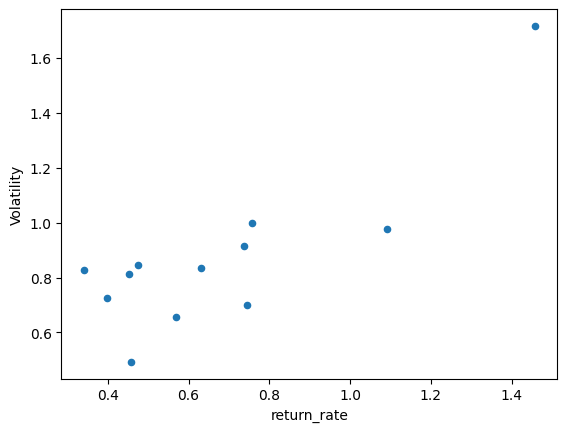

In [62]:
subset.plot(kind='scatter', x='return_rate', y='Volatility')

In [63]:
def return_models(name_model='kmeans'):
    match name_model:
        case 'kmeans':
            return KMeans
        case 'agglomerative':
            return AgglomerativeClustering
        case 'gmm':
            return GaussianMixture


def clustering_alg(data, max_cluster=5, name_model='kmeans'):

    model = return_models(name_model)
    silhouette_score_list = []

    for i in range(2, max_cluster):
        model_ = model(i) 
        model_.fit(data)
    
        silhouette_score_list.append((i,silhouette_score(data, model_.fit_predict(data))))

    return pd.DataFrame(silhouette_score_list)

In [64]:
lista_ = clustering_alg(subset,max_cluster=7, name_model='agglomerative')

In [65]:
def compute_best_cluster(list_score):
    return list_score.iloc[list_score[1].idxmax()][0]

In [66]:
compute_best_cluster(lista_)

np.float64(2.0)

In [67]:
def train_model(data, best_cluster, name_model='kmeans'):
    model = return_models(name_model)
    model_ = model(int(best_cluster))
    labels_ = model_.fit_predict(data)

    data['labels'] = labels_
    return data

In [68]:
subset = train_model(subset, compute_best_cluster(lista_), name_model='agglomerative')

In [69]:
from arch.unitroot.cointegration import phillips_ouliaris

def cointegration(data):
    data = data.dropna()
    dicionario = {
        'pares':[],
        'pvalue':[],
    }
    n = data.shape[1]

    for i in range(n-1):
        for j in range(i+1, n-1):
            pares = (data.columns[i], data.columns[j])
            serie_1 = data.iloc[:, i]
            serie_2 = data.iloc[:, j]
            result = phillips_ouliaris(serie_1, serie_2, trend='ct')

            pvalue = result.pvalue

            if pvalue < 0.05:
                dicionario['pares'].append(pares)
                dicionario['pvalue'].append(pvalue)
    return pd.DataFrame(dicionario)

In [70]:
def find_cointegrated_pairs(subset, data):
    dfs = []
    for labels in subset['labels'].unique():
        subset_ = subset[subset['labels'] == labels].index.tolist()
        dfs.append(cointegration(data[subset_]))
    return pd.concat(dfs, axis=0)

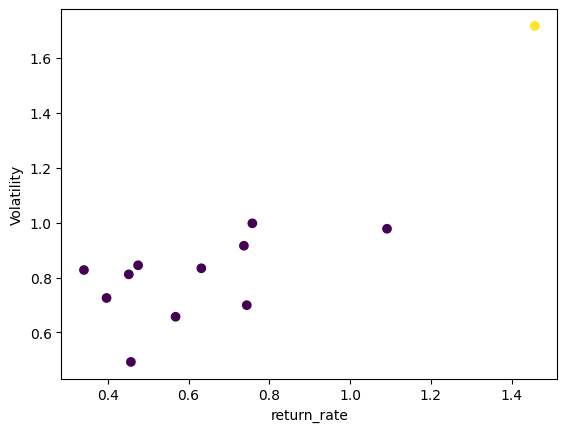

In [71]:
plt.scatter(subset['return_rate'], subset['Volatility'], c=subset['labels'])
plt.xlabel('return_rate')
plt.ylabel('Volatility')
plt.show()

In [72]:
dict_ = find_cointegrated_pairs(subset, stocks)

In [73]:
dict_

,pares,pvalue
0,"(ETH-USD, SOL-USD)",0.035592
1,"(LTC-USD, XRP-USD)",0.015967
2,"(LTC-USD, BCH-USD)",0.026316
3,"(LTC-USD, DOT-USD)",0.017988


In [74]:
subset[subset.index=='LTC-USD']

,return_rate,Volatility,labels
Ticker,,,
LTC-USD,0.397037,0.725603,0


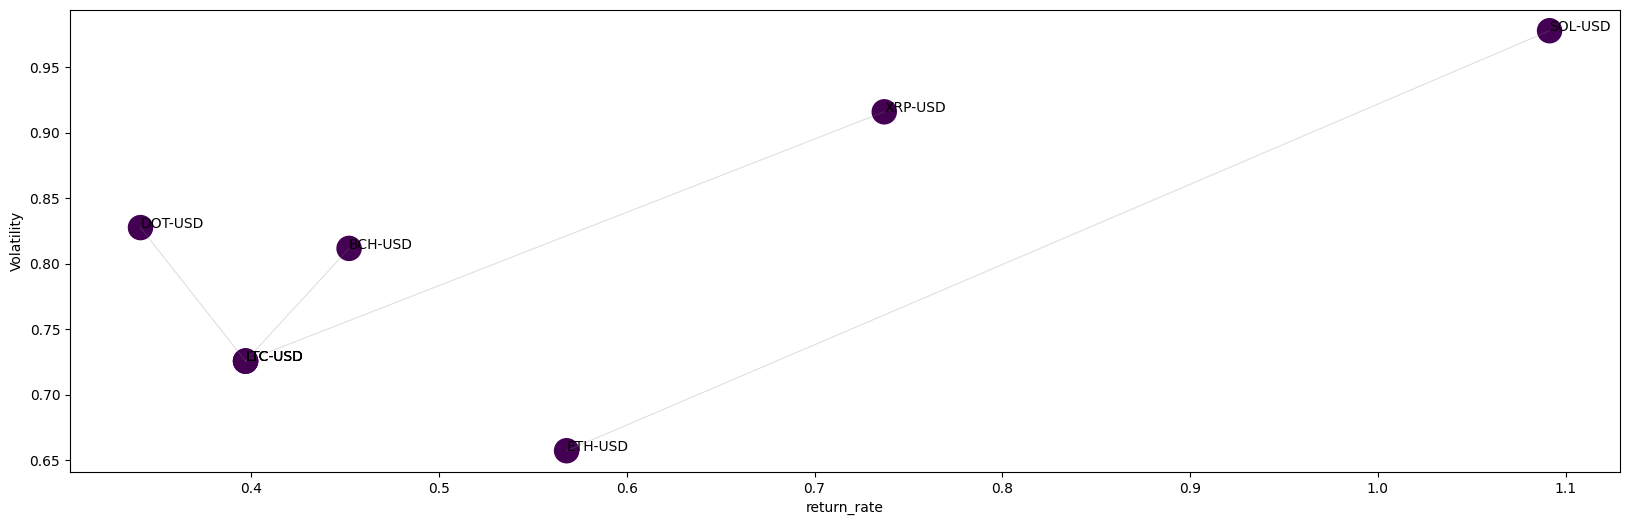

In [75]:
X = []
Y = []
labels = []
tickets = []
plt.figure(figsize=(20, 6))
for par in dict_['pares']:
    x1, y1 = subset[subset.index == par[0]][['return_rate', 'Volatility']].values[0].tolist()
    x2, y2 = subset[subset.index == par[1]][['return_rate', 'Volatility']].values[0].tolist()

    plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.25, linewidth=0.8)

    X.append(x1)
    Y.append(y1)
    X.append(x2)
    Y.append(y2)

    labels_ = subset[subset.index == par[0]]['labels'].values[0]
    labels.append(labels_)
    labels.append(labels_)

    tickets.append(par[0])
    tickets.append(par[1])


plt.scatter(X, Y, c=labels, s=300)
plt.xlabel('return_rate')

for i, txt in enumerate(tickets):
    plt.annotate(txt, (X[i], Y[i]), xytext=(0, 0), textcoords='offset points')

plt.ylabel('Volatility')
plt.show()